In [1]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [4]:
import keras
from keras.preprocessing import image
import tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import img_to_array
from tensorflow.keras.models import load_model
from keras.applications.vgg19 import VGG19,preprocess_input,decode_predictions

In [8]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='jlujDjfv46CJUtYgXe5mcWHqxMRVaZE133gMUrzSboO9',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'fertilizerrecommendationsystem-donotdelete-pr-dumrnw82lkheaa'
object_key = 'fruit-dataset.zip'

streaming_body_1 = cos_client.get_object(Bucket=bucket, Key=object_key)['Body']

# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about the possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/


In [9]:
from io import BytesIO
import zipfile
unzip = zipfile.ZipFile(BytesIO(streaming_body_1.read()), "r")
file_paths = unzip.namelist() 
for path in file_paths:
    unzip.extract(path)

In [10]:
pwd

'/home/wsuser/work'

In [11]:
os.listdir('/home/wsuser/work/fruit-dataset/train')

['Corn_(maize)___Northern_Leaf_Blight',
 'Apple___healthy',
 'Apple___Black_rot',
 'Corn_(maize)___healthy',
 'Peach___healthy',
 'Peach___Bacterial_spot']

In [12]:
train_datagen=ImageDataGenerator(zoom_range=0.5,shear_range=0.3,horizontal_flip=True,preprocessing_function=preprocess_input)
val_datagen=ImageDataGenerator(preprocessing_function=preprocess_input)

In [14]:
train=train_datagen.flow_from_directory('/home/wsuser/work/fruit-dataset/test',target_size=(256,256),batch_size=32)

val=val_datagen.flow_from_directory('/home/wsuser/work/fruit-dataset/train',target_size=(256,256),batch_size=32)

Found 1686 images belonging to 6 classes.
Found 5384 images belonging to 6 classes.


In [15]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [16]:
import scipy

In [17]:
t_img,label=train.next()

In [18]:
t_img.shape

(32, 256, 256, 3)

In [19]:
def plotImage(imgarr,label):
  for im,l in zip(imgarr,label):
    plt.figure(figsize=(5,5))
    plt.imshow(im/255)
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


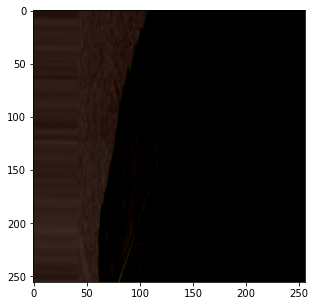

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


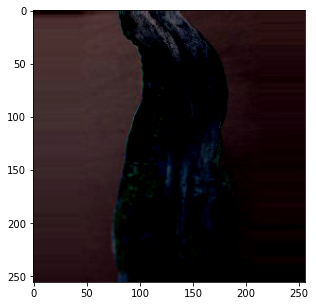

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


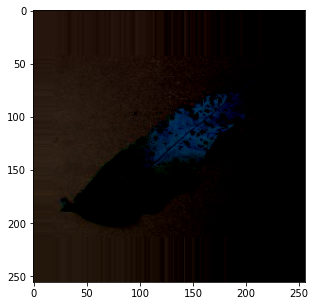

In [20]:
plotImage(t_img[:3],label[:3])

In [21]:
from keras.layers import Dense,Flatten
from keras.models import Model
from keras.applications.vgg19 import VGG19
import keras

In [22]:
base_model=VGG19(input_shape=(256,256,3),include_top=False)

80150528/80134624 [==============================] - 0s 0us/step


In [23]:
for layer in base_model.layers:
  layer.trainable=False

In [24]:
base_model.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [25]:
X=Flatten()(base_model.output)
X=Dense(units=6,activation='softmax')(X)

model=Model(base_model.input,X)

In [26]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [27]:
model.compile(optimizer='adam',loss=keras.losses.categorical_crossentropy,metrics=['accuracy'])

In [28]:
from keras.callbacks import ModelCheckpoint,EarlyStopping

es=EarlyStopping(monitor='val_accuracy',min_delta=0.01,patience=3,verbose=1)

mc=ModelCheckpoint(filepath='best_model.h5',monitor='val_accuracy',min_delta=0.01,patience=3,verbose=1,save_best_only=True)


cb=[es,mc]

In [29]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [30]:
model.fit_generator(train,steps_per_epoch=16,epochs=50,verbose=1,callbacks=cb,validation_data=val,validation_steps=16)

/tmp/wsuser/ipykernel_291/1613728924.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train,steps_per_epoch=16,epochs=50,verbose=1,callbacks=cb,validation_data=val,validation_steps=16)


Epoch 1/50
16/16 [==============================] - ETA: 0s - loss: 6.7806 - accuracy: 0.6773 
Epoch 00001: val_accuracy improved from -inf to 0.92578, saving model to best_model.h5
16/16 [==============================] - 364s 23s/step - loss: 6.7806 - accuracy: 0.6773 - val_loss: 1.8851 - val_accuracy: 0.9258
Epoch 2/50
16/16 [==============================] - ETA: 0s - loss: 1.6671 - accuracy: 0.8887 
Epoch 00002: val_accuracy improved from 0.92578 to 0.93750, saving model to best_model.h5
16/16 [==============================] - 371s 24s/step - loss: 1.6671 - accuracy: 0.8887 - val_loss: 0.6966 - val_accuracy: 0.9375
Epoch 3/50
16/16 [==============================] - ETA: 0s - loss: 0.7888 - accuracy: 0.9277 
Epoch 00003: val_accuracy improved from 0.93750 to 0.94141, saving model to best_model.h5
16/16 [==============================] - 372s 24s/step - loss: 0.7888 - accuracy: 0.9277 - val_loss: 0.6901 - val_accuracy: 0.9414
Epoch 4/50
16/16 [==============================] - ETA

In [31]:
ls

best_model.h5  fruit-dataset/


In [32]:
model.save('fruit.h5')

In [45]:
!tar -zcvf fruit-model_new.tgz fruit.h5

fruit.h5


In [46]:
ls -1

best_model.h5
fruit-dataset/
fruit.h5
fruit-model_new.tgz
Train-model_new.tgz


In [35]:
!pip install watson-machine-learning-client --upgrade

     |████████████████████████████████| 538 kB 20.6 MB/s eta 0:00:01


In [36]:
from ibm_watson_machine_learning import APIClient

wml_credentials = {
                    "url": "https://us-south.ml.cloud.ibm.com",
                   "apikey":"LnrPghX-9XYyZx-B5o_IAQonJi2sqdggDpocgERsHhab" 
                  }

client = APIClient(wml_credentials)

In [37]:
def guid_from_space_name(client, space_name): 
    space = client.spaces.get_details()
    return(next(item for item in space['resources'] if item['entity']["name"]==space_name)['metadata']['id'])

In [39]:
space_uid = guid_from_space_name(client, 'fertilzer_recommender') 
print("Space UID = " + space_uid)

Space UID = 7ddaf633-0d72-44ef-87f9-d6ee82b9d6b5


In [40]:
client.set.default_space(space_uid)

'SUCCESS'

In [41]:
client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12      020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9      0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt22.2-py3.10        125b6d9

In [44]:
software_space_uid = client.software_specifications.get_uid_by_name("tensorflow_rt22.1-py3.9")
software_space_uid

'acd9c798-6974-5d2f-a657-ce06e986df4d'

In [47]:
model_details = client.repository.store_model(model= 'fruit-model_new.tgz',
    meta_props={
        client.repository.ModelMetaNames.NAME:"CNN",
        client.repository.ModelMetaNames.TYPE:"tensorflow_2.7",
        client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_space_uid}
    )

In [48]:
model_id = client.repository.get_model_id(model_details)

In [49]:
model_id

'37eb82d0-f7ea-436b-a9d6-194203407147'

In [50]:
ls

best_model.h5   fruit.h5             Train-model_new.tgz
fruit-dataset/  fruit-model_new.tgz


In [52]:
model1=load_model('fruit.h5')

In [55]:
imge=tensorflow.keras.utils.load_img(r'/home/wsuser/work//fruit-dataset/test/Apple___Black_rot/0b8dabb7-5f1b-4fdc-b3fa-30b289707b90___JR_FrgE.S 3047.JPG',target_size=(256,256))

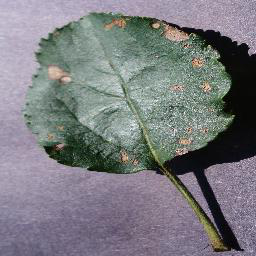

In [56]:
imge

In [57]:
x=img_to_array(imge)
im=preprocess_input(x)
image1=np.expand_dims(im,axis=0)


In [58]:
pred=np.argmax(model1.predict(image1))

In [61]:
if pred == 0:
    print ("Apple Black Rots")
if pred == 1:
    print ("Apple Healthy")
if pred == 2:
    print ("Corn(maize) Northern Leaf Blight")
if pred == 3:
    print ("Corn Healthy")
if pred == 4:
    print ("peach Bacterial Spots")
if pred == 5:
    print ("peach healthy")

Apple Black Rots
